<a href="https://colab.research.google.com/github/Kalp13M/CN6005/blob/main/WEEK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
csvfile="diabetesN.csv"
#please note your csvfilePAth would be the path where you uploaded and saved the diabetesN.csv
csvfilePath='/content/diabetesN.csv' # Corrected file path
pima = pd.read_csv(csvfilePath)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


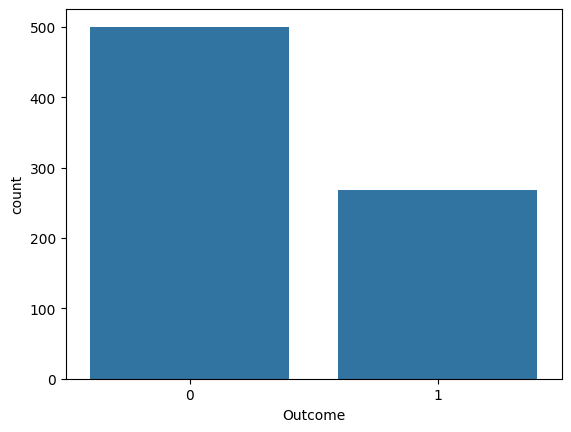

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Outcome', data =pima )

# Show the plot
plt.show()

In [ ]:
count_no_sub = len(pima[pima['Outcome']==0])
count_sub = len(pima[pima['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Diabetics is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Diabetics", pct_of_sub*100)

percentage of no Diabetics is 65.10416666666666
percentage of Diabetics 34.89583333333333


In [ ]:
pima.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Featur


y = pima.Outcome # Target variable
X
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#let see how many  0 and 1 are in outcome for test dataset
print(y_test.value_counts())

Outcome
0    125
1     67
Name: count, dtype: int64


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

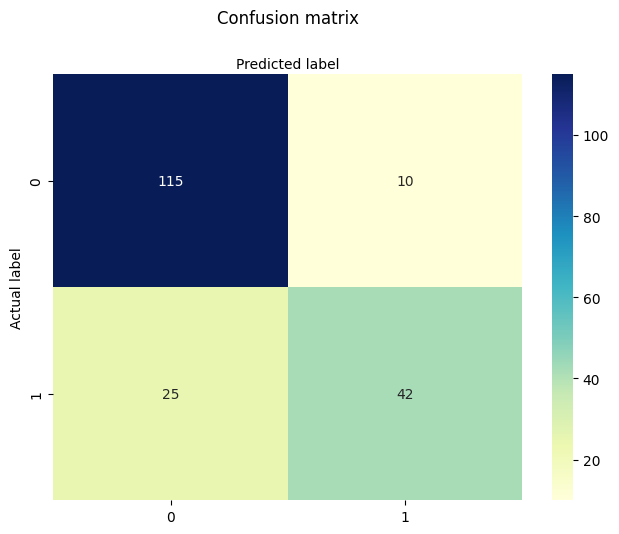

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8076923076923077
0.6268656716417911


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



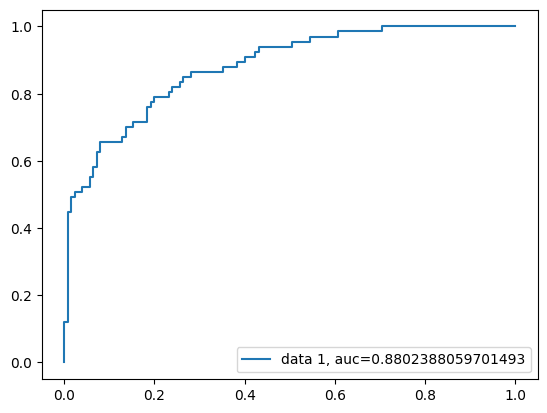

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
y_resampled.value_counts()

,count
Outcome,
1,500
0,500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[95, 34],
       [31, 90]])

Text(0.5, 427.9555555555555, 'Predicted label')

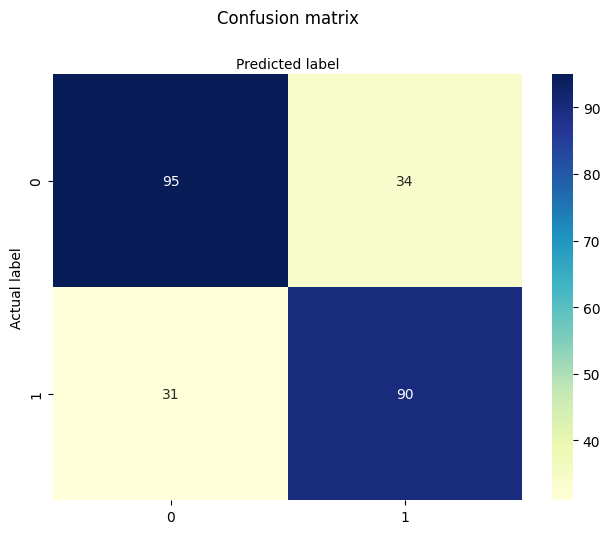

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7258064516129032
0.743801652892562


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.75      0.74      0.75       129
   with diabetes       0.73      0.74      0.73       121

        accuracy                           0.74       250
       macro avg       0.74      0.74      0.74       250
    weighted avg       0.74      0.74      0.74       250



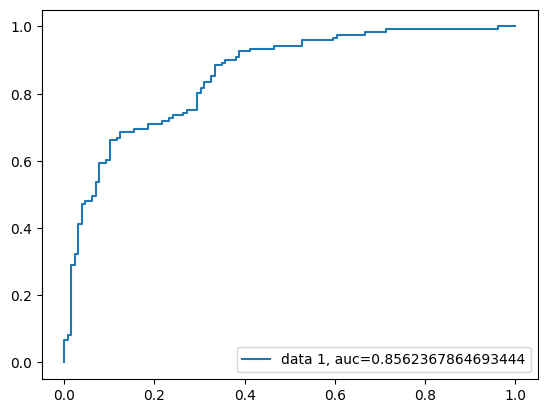

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Multiclassifition Code

In [ ]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats

# Lines below are just to ignore warnings

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()
print(iris.feature_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
##Separating features and the target
#Let’s separate features and the target in X and y respectively.
X= df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
print(X)
Y=df['target']

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(df.shape)
print(df.info())
print(df.target.value_counts())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr')

# fit the model with data
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)

0.9553571428571429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 11,  4],
       [ 0,  2,  8]])

Text(0.5, 427.9555555555555, 'Predicted label')

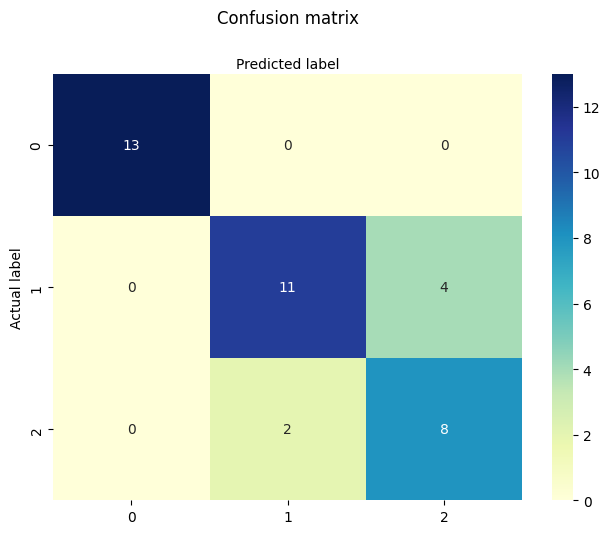

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.73      0.79        15
           2       0.67      0.80      0.73        10

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38



In [ ]:
logreg.predict_proba(X_test)[:3]

array([[8.61630554e-03, 3.33035415e-01, 6.58348279e-01],
       [9.58421761e-01, 4.15726856e-02, 5.55358738e-06],
       [8.28109799e-03, 3.76269848e-01, 6.15449054e-01]])

Use  Titanic dataset  and write KNN and logistic Regression classifiers and compare the accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
import pandas as pd # Added this import to ensure pd is defined

# --- 1. Data Loading (Adapted for Google Colab) ---

# To run this in Google Colab:
# 1. Upload your 'titanic (1).csv' file using the file/folder icon on the left sidebar.
# 2. The file path will be './titanic (1) (3).csv'
file_path = "/content/titanic (1).csv" # Corrected file path

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from {file_path}. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please ensure 'titanic (1).csv' has been uploaded to the Colab environment.")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

Successfully loaded dataset from /content/titanic (1).csv. Shape: (891, 8)


In [ ]:
# --- 2. Data Preprocessing and Feature Engineering ---

# Select relevant features: Pclass, Sex, Age, Fare are predictors (X), Survived is the target (y)
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

X = df[features].copy()
y = df[target]

# 2.1 Handle Missing Values
# Fill missing 'Age' values with the median age.
X['Age'].fillna(X['Age'].median(), inplace=True)
# Fill missing 'Fare' values with the median fare.
X['Fare'].fillna(X['Fare'].median(), inplace=True)

/tmp/ipython-input-910322162.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
/tmp/ipython-input-910322162.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Encode Categorical Features
# Convert 'Sex' ('male', 'female') into a binary numerical feature ('IsMale').
if 'Sex' in X.columns:
    X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
    X.rename(columns={'Sex_male': 'IsMale'}, inplace=True)
else:
    print("'Sex' column not found in DataFrame X. It might have already been encoded.")

In [ ]:
# Feature Scaling (Crucial for distance-based algorithms like KNN)
# Standardization ensures all features contribute equally to the distance calculation.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# --- 3. Split Data ---
# Split the data into 80% training and 20% testing sets. Stratify=y maintains the proportion of the target variable (Survived) in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")



Training set size: 712 samples
Testing set size: 179 samples


In [ ]:
# --- 4. Logistic Regression Classifier ---
print("\n--- Running Logistic Regression ---")
# Logistic Regression models the probability of survival using a sigmoid function. [Image of Logistic Regression Sigmoid Curve]
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg:.4f}")

# Cross-validation provides a more robust estimate of performance across different data folds.
cv_scores_log_reg = cross_val_score(log_reg_model, X_scaled_df, y, cv=5, scoring='accuracy')
print(f"Logistic Regression 5-fold Cross-Validation Mean Accuracy: {np.mean(cv_scores_log_reg):.4f}")


--- Running Logistic Regression ---
Logistic Regression Test Accuracy: 0.7877
Logistic Regression 5-fold Cross-Validation Mean Accuracy: 0.7856


In [ ]:
# --- 5. K-Nearest Neighbors (KNN) Classifier ---
print("\n--- Running K-Nearest Neighbors (KNN) ---")

# Tune Hyperparameter K (Number of Neighbors) using GridSearchCV
# GridSearchCV finds the best 'K' by testing multiple values (1 to 30) using cross-validation.
knn_model = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best K found via GridSearchCV: {best_k}")





--- Running K-Nearest Neighbors (KNN) ---
Best K found via GridSearchCV: 4


In [ ]:
#  Train and Evaluate KNN with the best K
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_best_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN (K={best_k}) Test Accuracy: {accuracy_knn:.4f}")

# Cross-validation for robust evaluation
cv_scores_knn = cross_val_score(knn_best_model, X_scaled_df, y, cv=5, scoring='accuracy')
print(f"KNN (K={best_k}) 5-fold Cross-Validation Mean Accuracy: {np.mean(cv_scores_knn):.4f}")

KNN (K=4) Test Accuracy: 0.8101
KNN (K=4) 5-fold Cross-Validation Mean Accuracy: 0.8160


In [ ]:
# --- 6. Comparison ---
print("\n--- Model Comparison ---")

if accuracy_log_reg > accuracy_knn:
    winner = "Logistic Regression"
elif accuracy_knn > accuracy_log_reg:
    winner = f"K-Nearest Neighbors (K={best_k})"
else:
    winner = "Both models achieved the same accuracy"

print(f"\nFinal Test Accuracy Scores:")
print(f"Logistic Regression: {accuracy_log_reg:.4f}")
print(f"KNN (K={best_k}):          {accuracy_knn:.4f}")
print(f"\nConclusion: {winner} performed better on the test set.")


--- Model Comparison ---

Final Test Accuracy Scores:
Logistic Regression: 0.7877
KNN (K=4):          0.8101

Conclusion: K-Nearest Neighbors (K=4) performed better on the test set.
